In [2]:
import xarray as xr
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../data/deltares/gtsm/reanalysis_mean_nl.csv', index_col=0, parse_dates=['time'])

stations = ['NWS_NO_TS_MO_Harlingen', 'NWS_NO_TS_MO_Ijmuiden',
    'NWS_NO_TS_MO_Vlissingen', 'id_obs_delfzijl_del_nl_rws',
    'id_obs_denhelder_hel_nl_rws', 'id_obs_hoekvanholla_hvh_nl_rws'
]
df['mean'] = df[stations].mean(axis=1)
df['year'] = df.time.dt.year

Text(0.5, 1.0, 'Mean storm surge for locations near 6 main tide gauges along the Dutch coast')

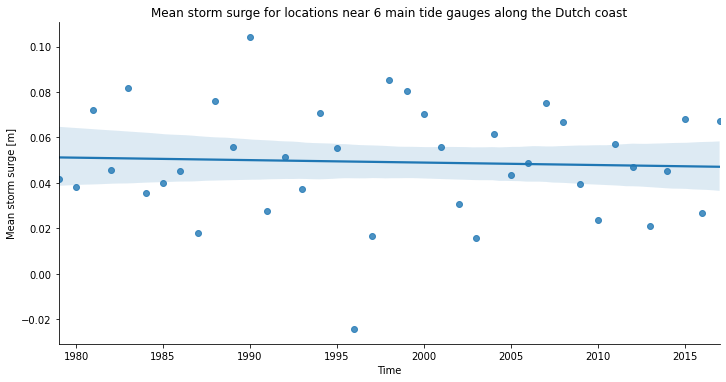

In [4]:
surge_df = df.query('variable == "surge"').sort_values('time')
selected = surge_df.groupby('year').agg('mean').reset_index()
grid = sns.lmplot(x='year', y='mean', data=selected, aspect=2)
ax = grid.axes[0, 0]
ax.set_xlabel('Time')
ax.set_ylabel('Mean storm surge [m]')
ax.set_title('Mean storm surge for locations near 6 main tide gauges along the Dutch coast')


Text(0.5, 1.0, 'Mean water level for locations near 6 main tide gauges along the Dutch coast')

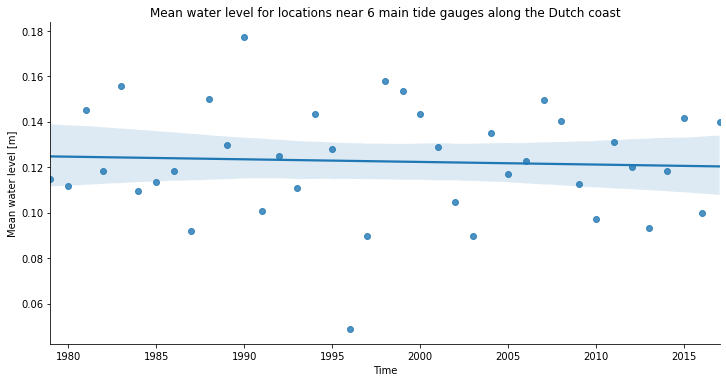

In [5]:
surge_df = df.query('variable == "waterlevel"').sort_values('time')
selected = surge_df.groupby('year').agg('mean').reset_index()
grid = sns.lmplot(x='year', y='mean', data=selected, aspect=2)
ax = grid.axes[0, 0]
ax.set_xlabel('Time')
ax.set_ylabel('Mean water level [m]')
ax.set_title('Mean water level for locations near 6 main tide gauges along the Dutch coast')


(0.0, 0.2)

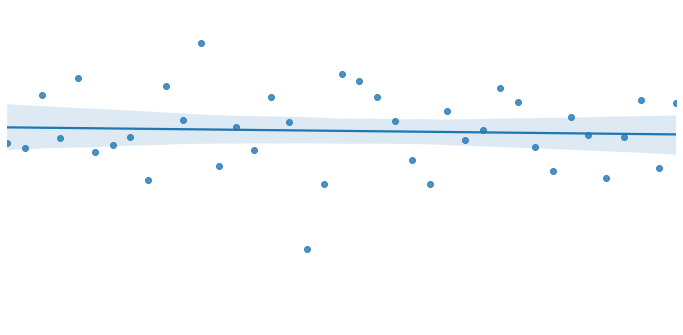

In [10]:
surge_df = df.query('variable == "waterlevel"').sort_values('time')
selected = surge_df.groupby('year').agg('mean').reset_index()
grid = sns.lmplot(x='year', y='mean', data=selected, aspect=2)
ax = grid.axes[0, 0]
ax.axis(False)
ax.set_ylim(0.0, 0.2)

Text(0.5, 1.0, 'Mean tidal water level (anomalies) for locations near 6 main tide gauges along the Dutch coast')

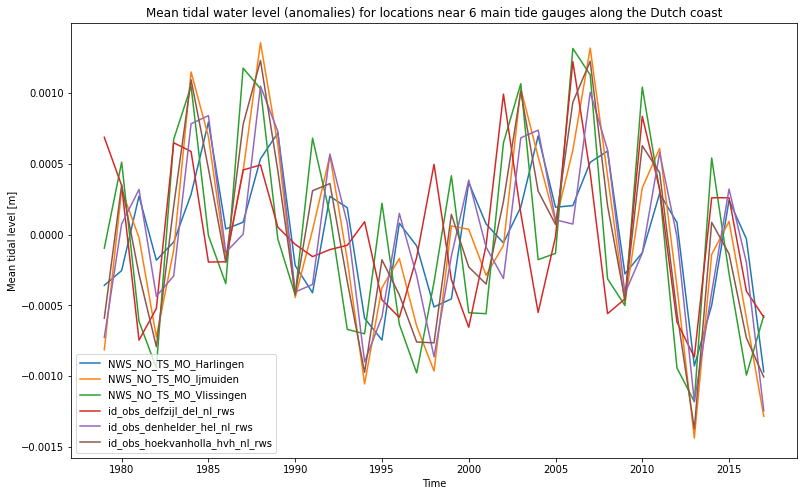

In [75]:
surge_df = df.query('variable == "tide"').sort_values('time').copy()
selected = surge_df.groupby('year').agg('mean').reset_index()
selected[stations] = selected[stations] - selected[stations].mean(axis=0)

fig, ax = plt.subplots(figsize=(13, 8))
selected.plot('year', stations, ax=ax)

ax.legend()

ax.set_xlabel('Time')
ax.set_ylabel('Mean tidal level [m]')
ax.set_title('Mean tidal water level (anomalies) for locations near 6 main tide gauges along the Dutch coast')


In [73]:
selected[stations].mean(axis=0)

NWS_NO_TS_MO_Harlingen            0.067928
NWS_NO_TS_MO_Ijmuiden             0.054625
NWS_NO_TS_MO_Vlissingen           0.053776
id_obs_delfzijl_del_nl_rws        0.174072
id_obs_denhelder_hel_nl_rws       0.035522
id_obs_hoekvanholla_hvh_nl_rws    0.054395
dtype: float64